In [4]:
import pickle
import itertools
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ranksums
from scipy import stats

In [5]:
pickle_in = open("errors.p","rb")
errors = pickle.load(pickle_in)


In [9]:
stats.friedmanchisquare(*[errors[k] for k in errors.keys()])

FriedmanchisquareResult(statistic=77.6822742474915, pvalue=5.393121464539751e-16)

In [10]:
from mleap.analyze_results import AnalyseResults
from mleap.data import Data
data = Data()
input_io = data.open_hdf5('data/delgado.hdf5', mode='r')
out_io = data.open_hdf5('data/experiments.hdf5', mode='a')

In [11]:
import scikit_posthocs as sp
sp.posthoc_nemenyi(arr)

array([[-1.        ,  0.93545472,  0.99042065,  0.99999993,  0.87152458],
       [ 0.93545472, -1.        ,  0.99781393,  0.94196055,  0.99977512],
       [ 0.99042065,  0.99781393, -1.        ,  0.9921401 ,  0.98779686],
       [ 0.99999993,  0.94196055,  0.9921401 , -1.        ,  0.88141119],
       [ 0.87152458,  0.99977512,  0.98779686,  0.88141119, -1.        ]])

In [8]:
arr = []
for k in errors.keys():
    arr.append(errors[k])

In [9]:
arr

[array([  4.13882288e-01,   1.15363015e-01,   5.42753071e-02,
          1.58222633e-01,   3.04054530e-01,   1.37659172e+01,
          1.19534275e+01,   2.88284680e-01,   2.90387118e-01,
          1.02651881e-01,   1.87238521e-01,   1.97775388e-01,
          5.28829699e-02,   9.22663094e-02,   1.99527809e-01,
          6.23552082e-01,   3.32695957e-01,   5.30382940e+00,
          2.05966947e-01,   1.93908792e+01,   1.50188615e-01,
          2.29177702e-01,   2.11865724e-01,   4.99855262e+00,
          1.85841190e-01,   7.45048470e-01,   1.22514767e-01,
          2.27714770e-01,   4.02647102e-01,   1.64855940e-01,
          5.43146603e-01,   1.52682009e-01,   1.65994439e-01,
          1.57273335e-01,   2.39626883e+00,   9.69027494e-01,
          1.89212304e-01,   4.78189576e-01,   6.52477664e-01,
          1.47912354e-01,   9.94503637e-01,   1.27307256e+00,
          1.30103609e-01,   2.50498216e-01,   1.72587122e-01,
          2.05995953e-01,   1.83365320e+00,   1.34855726e-01,
        

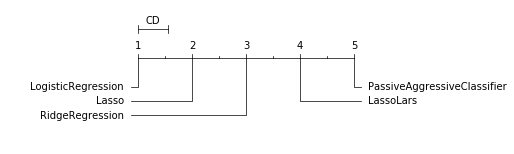

In [21]:
avg_err = []
labels = []
import Orange
import matplotlib.pyplot as plt
import scipy.stats as ss

for k in errors.keys():
    labels.append(k)
    m = np.average(errors[k])
    avg_err.append(m)

avg_rank = ss.rankdata(avg_err)
n = len(errors[labels[0]])

cd = Orange.evaluation.compute_CD(avg_rank, n)
Orange.evaluation.graph_ranks(avg_rank, labels, cd=cd, width=6, textspace=1.5)
plt.show()

In [18]:
cd

0.856344

In [18]:
analyze = AnalyseResults(hdf5_output_io=out_io, hdf5_input_io=input_io)
wilc_arr, wilc_df  = analyze.wilcoxon_test(errors)

In [5]:
errors

NameError: name 'errors' is not defined

C:\Python\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


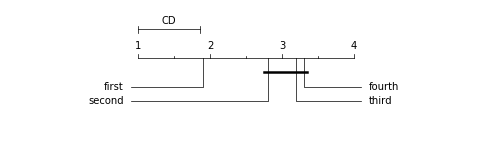

In [20]:
from stac.nonparametric_tests import nemenyi_multitest
nemenyi_multitest(wilc_df['statistic'])

ModuleNotFoundError: No module named 'stac.nonparametric_tests'

In [125]:
a = (errors['Lasso'], errors['LassoLars'], errors['RidgeRegression'])

In [127]:
a

(array([4.13882288e-01, 1.15363015e-01, 5.42753071e-02, 1.58222633e-01,
        3.04054530e-01, 1.37659172e+01, 1.19534275e+01, 2.88284680e-01,
        2.90387118e-01, 1.02651881e-01, 1.87238521e-01, 1.97775388e-01,
        5.28829699e-02, 9.22663094e-02, 1.99527809e-01, 6.23552082e-01,
        3.32695957e-01, 5.30382940e+00, 2.05966947e-01, 1.93908792e+01,
        1.50188615e-01, 2.29177702e-01, 2.11865724e-01, 4.99855262e+00,
        1.85841190e-01, 7.45048470e-01, 1.22514767e-01, 2.27714770e-01,
        4.02647102e-01, 1.64855940e-01, 5.43146603e-01, 1.52682009e-01,
        1.65994439e-01, 1.57273335e-01, 2.39626883e+00, 9.69027494e-01,
        1.89212304e-01, 4.78189576e-01, 6.52477664e-01, 1.47912354e-01,
        9.94503637e-01, 1.27307256e+00, 1.30103609e-01, 2.50498216e-01,
        1.72587122e-01, 2.05995953e-01, 1.83365320e+00, 1.34855726e-01,
        5.37540499e-02, 6.10535750e+00, 2.62207860e-01, 4.11415101e+01,
        1.68365953e+01, 8.61114779e-01, 5.31342042e-01, 3.071452